<div class="Differences between age groups">New-Use-Case Key difference between Age Groups</div>

<div class="Adersh Antony"><b>Authored by: </b> {Adersh Antony}</div>

<div class="usecase-duration"><b>Duration:</b> {110} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, Data Analysis, Data Visualization}</div>
</div>

<div class="usecase-section-header">Scenario</div>

### User Story:
As a data analyst, I want to compare the wellbeing of different demographic groups (young people, old people, workers, and families) so that I can identify key differences and overlaps to inform better policy-making and resource allocation.


<div class="usecase-section-header"></div>

<div class="usecase-section-header">{Introduction}</div>

### Tutorial Overview:

This tutorial will guide you through analyzing the wellbeing of various demographic groups, focusing on young people, older adults, workers, and families. The goal is to identify key differences and overlaps in aspects of wellbeing, such as physical health, mental health, economic stability, and social engagement. Understanding these differences will help inform policy-makers and community service providers, leading to more effective resource allocation and better-targeted interventions.

### By the end of this tutorial, you'll be able to:
- Perform comprehensive data analysis using Python
- Interpret the results of your analysis
- Provide data-driven recommendations based on your findings

The datasets you'll use in this analysis will be sourced from the Melbourne Open Data Portal, focusing on demographic and wellbeing indicators.



In [ ]:
<div class="usecase-section-header">{Objective}</div>

### Learning Objectives:

- Gain skills in collecting and cleaning demographic and wellbeing data
- Learn to perform comparative statistical analysis
- Develop the ability to visualize and interpret data
- Understand how to derive actionable insights from data analysis
- Improve your reporting and recommendation skills


# Importing Necessary Modules

In [6]:
import requests
import pandas as pd
from io import StringIO
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Collection and Information

This section includes code for collecting data from an API and displaying dataset information.

## Loading Environment Variables

To manage API keys securely, use the `python-dotenv` package to load environment variables.

## Collect Data
Collect data for older people profile and younger people profile using the collect_data function.

## Display 
Display information for the older people profile dataset and the younger people profile dataset.

In [8]:
load_dotenv()

def collect_data(dataset_id):
    base_url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/"
    apikey = os.getenv("")  
    
    format = 'csv'
    
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'Australia/Melbourne',
        'api_key': apikey
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        url_content = response.content.decode('utf-8-sig')
        
        # Preview the first few lines of the raw data
        print("Raw Data Preview:")
        print("\n".join(url_content.split("\n")[:10]))
        
        try:
            dataset = pd.read_csv(StringIO(url_content), delimiter=';', on_bad_lines='skip')
            return dataset
        except pd.errors.ParserError as e:
            print(f'Parsing Error: {e}')
            return None
    else:
        print(f'Request failed with status code {response.status_code}')
        return None

# Collect data for older people profile
older_people_data = collect_data('older-people-profile-2016-60-years-and-over')

# Collect data for younger people profile
younger_people_data = collect_data('younger-people-profile-2016-15-24-years')

# Display Dataset Information
def dataset_info(data, name):
    print(f"\n# {name} Dataset Info:\n")
    print(data.info())
    print("\nUnique values in each column:\n")
    for column in data.columns:
        print(f"{column}: {data[column].nunique()}")

# Example usage
print("\nOlder People Profile Dataset Info:")
dataset_info(older_people_data, "Older People Profile")

print("\nYounger People Profile Dataset Info:")
dataset_info(younger_people_data, "Younger People Profile")


Raw Data Preview:
profile;census_year;category;sub_category;sub_order;value
Older people (60 years and over);2016;Gender;Female;2;6484
Older people (60 years and over);2016;Age;Under 60 years;1;0
Older people (60 years and over);2016;Age;65-69 years;3;3187
Older people (60 years and over);2016;Age;70-74 years;4;2102
Older people (60 years and over);2016;Age;75-79 years;5;1379
Older people (60 years and over);2016;Age and gender;Male 60-64 years;2;1781
Older people (60 years and over);2016;Age and gender;Male 65-69 years;3;1574
Older people (60 years and over);2016;Age and gender;Male 70-74 years;4;1089
Older people (60 years and over);2016;Age and gender;Male 75-79 years;5;686
Raw Data Preview:
profile;census_year;category;sub_category;sub_order;value
Younger people (15-24 years);2016;Providing child care;Cared for own child/children;2;110
Younger people (15-24 years);2016;Providing child care;Not applicable (under 15 years);6;0
Remaining population (0-14 yrs and 25 yrs and over);2016;

#Dataset Info:


Older People Profile Dataset Info:

# Older People Profile Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   profile       548 non-null    object
 1   census_year   548 non-null    int64 
 2   category      548 non-null    object
 3   sub_category  548 non-null    object
 4   sub_order     548 non-null    int64 
 5   value         548 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 25.8+ KB
None

Unique values in each column:

profile: 2
census_year: 1
category: 29
sub_category: 241
sub_order: 25
value: 430

Younger People Profile Dataset Info:

# Younger People Profile Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   profile       436 non-null    object
 1   census_year   436 non-null    int64 
 2   category      436 non-null    object
 3   sub_category  436 non-null    object
 4   sub_order     436 non-null    int64 
 5   value         436 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 20.6+ KB
None

Unique values in each column:

profile: 2
census_year: 1
category: 22
sub_category: 190
sub_order: 42
value: 339

# Data Preparation and Exploration

We will add a new column `profile_type` to each dataset to distinguish between "Older People" and "Younger People."

Next, we concatenate the older_people_data and younger_people_data DataFrames into a single DataFrame called combined_data
We will display information about the combined_data DataFrame, including the data types of each column and the number of non-null entries

Finally, we will display a sample of the data for each category in the combined dataset.

In [9]:
# Adding a distinguishing column to each dataset
older_people_data['profile_type'] = 'Older People'
younger_people_data['profile_type'] = 'Younger People'

# Combining both datasets into one DataFrame
combined_data = pd.concat([older_people_data, younger_people_data], ignore_index=True)

print("Combined Dataset:")
print(combined_data.head())

print("\nCombined Dataset Shape:", combined_data.shape)

# Check for missing values
print("\nMissing values in Combined Dataset:")
print(combined_data.isnull().sum())

# Display info about the combined dataset
print("\nCombined Dataset Info:")
print(combined_data.info())

# Display unique values in each column
print("\nUnique values in each column of Combined Dataset:")
for column in combined_data.columns:
    print(f"{column}: {combined_data[column].nunique()}")

# Display sample data for each category
print("\nSample data for each category in Combined Dataset:")
print(combined_data.groupby('category').first())

Combined Dataset:
                            profile  census_year category    sub_category  \
0  Older people (60 years and over)         2016   Gender          Female   
1  Older people (60 years and over)         2016      Age  Under 60 years   
2  Older people (60 years and over)         2016      Age     65-69 years   
3  Older people (60 years and over)         2016      Age     70-74 years   
4  Older people (60 years and over)         2016      Age     75-79 years   

   sub_order  value  profile_type  
0          2   6484  Older People  
1          1      0  Older People  
2          3   3187  Older People  
3          4   2102  Older People  
4          5   1379  Older People  

Combined Dataset Shape: (984, 7)

Missing values in Combined Dataset:
profile         0
census_year     0
category        0
sub_category    0
sub_order       0
value           0
profile_type    0
dtype: int64

Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 9

# Data Cleaning

## Handle Missing Values
Since there are no missing values in the dataset, this step can be skipped.

## Remove Duplicates
We will remove any duplicate rows from the `combined_data` DataFrame.

```python
combined_data = combined_data.drop_duplicates()

We will standardize the column names by converting them to lowercase and replacing spaces with underscores.


In [10]:
# Handle Missing Values: Since there are no missing values, we can skip this step.

# Remove Duplicates
combined_data = combined_data.drop_duplicates()

# Standardize Column Names
combined_data.columns = [col.strip().lower().replace(' ', '_') for col in combined_data.columns]

print("Data Cleaning Completed.")
print("\
Combined Dataset after Cleaning:")
print(combined_data.head())

print("\
Combined Dataset Shape after Cleaning:", combined_data.shape)

Data Cleaning Completed.
Combined Dataset after Cleaning:
                            profile  census_year category    sub_category  \
0  Older people (60 years and over)         2016   Gender          Female   
1  Older people (60 years and over)         2016      Age  Under 60 years   
2  Older people (60 years and over)         2016      Age     65-69 years   
3  Older people (60 years and over)         2016      Age     70-74 years   
4  Older people (60 years and over)         2016      Age     75-79 years   

   sub_order  value  profile_type  
0          2   6484  Older People  
1          1      0  Older People  
2          3   3187  Older People  
3          4   2102  Older People  
4          5   1379  Older People  
Combined Dataset Shape after Cleaning: (984, 7)


# Perform Exploratory Data Analysis (EDA)

## Summary Statistics
We will compute summary statistics for the `combined_data` DataFrame, including count, mean, standard deviation, min, max, and quartiles for numerical columns, and frequency counts for categorical columns.

```python
# Summary Statistics
summary_stats = combined_data.describe(include='all')


In [4]:
# Perform Exploratory Data Analysis (EDA)

# Summary Statistics
summary_stats = combined_data.describe(include='all')

# Calculate mode for each column
mode_stats = combined_data.mode().iloc[0]

print("Summary Statistics:")
print(summary_stats)

print("\
Mode for each column:")
print(mode_stats)

Summary Statistics:
                                 profile  census_year        category  \
count                                984        984.0             984   
unique                                 4          NaN              29   
top     Older people (60 years and over)          NaN  Age and gender   
freq                                 274          NaN             124   
mean                                 NaN       2016.0             NaN   
std                                  NaN          0.0             NaN   
min                                  NaN       2016.0             NaN   
25%                                  NaN       2016.0             NaN   
50%                                  NaN       2016.0             NaN   
75%                                  NaN       2016.0             NaN   
max                                  NaN       2016.0             NaN   

       sub_category   sub_order          value  profile_type  
count           984  984.000000     984.

# Data Visualization

##  Distribution of the 'Value' Column
We will plot the distribution of the `value` column using a histogram with a kernel density estimate (KDE) overlay to visualize its distribution.

##  Distribution of the 'Sub Order' Column
We will plot the distribution of the sub_order column using a histogram with a KDE overlay to understand its distribution.

## Distribution of the 'Category' Column
We will plot the distribution of the category column using a count plot to visualize the count of each category.

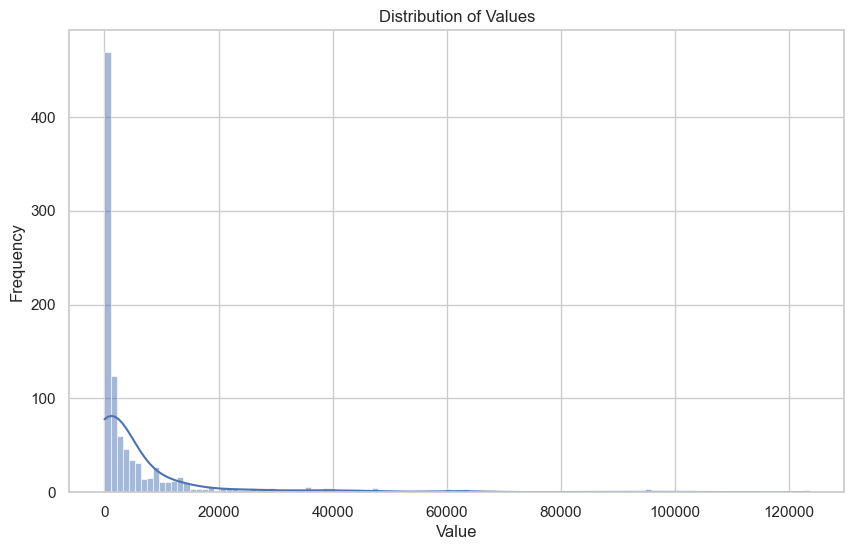

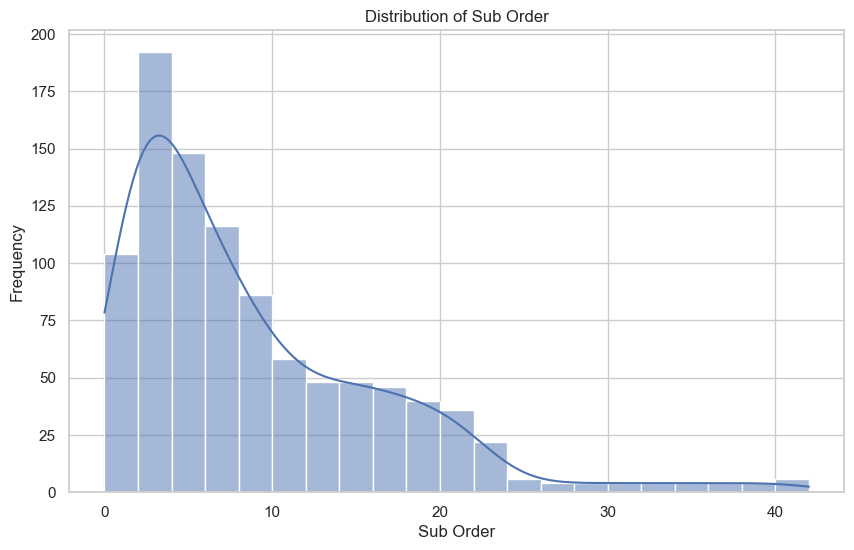

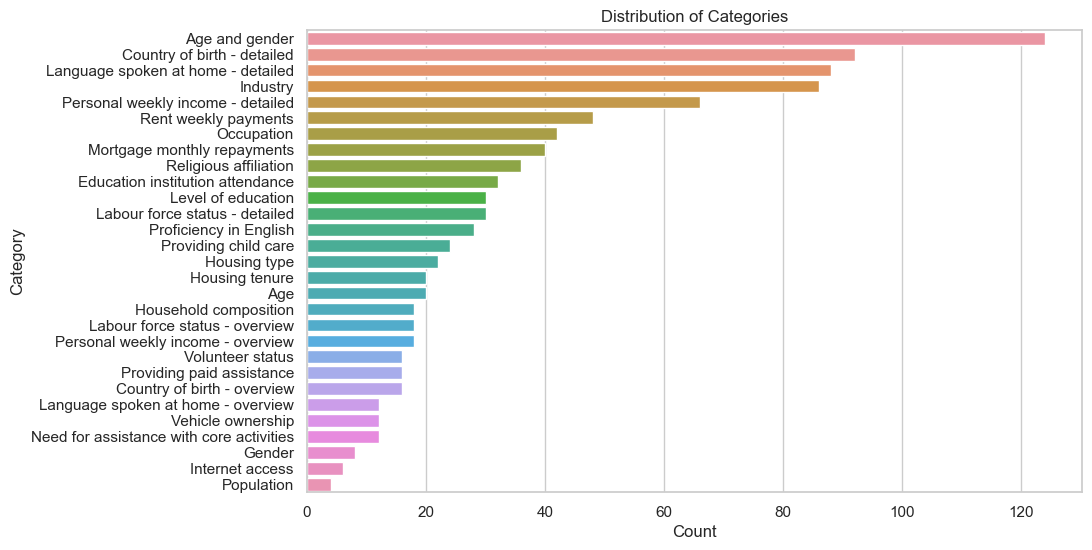

In [5]:


# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of the 'value' column
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['value'], kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the 'sub_order' column
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['sub_order'], kde=True)
plt.title('Distribution of Sub Order')
plt.xlabel('Sub Order')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the 'category' column
plt.figure(figsize=(10, 6))
sns.countplot(y=combined_data['category'], order=combined_data['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Correlation Analysis

## Correlation Heatmap

We will create a heatmap to visualize the correlation between numeric variables in the dataset. The heatmap will show the strength and direction of relationships between variables.

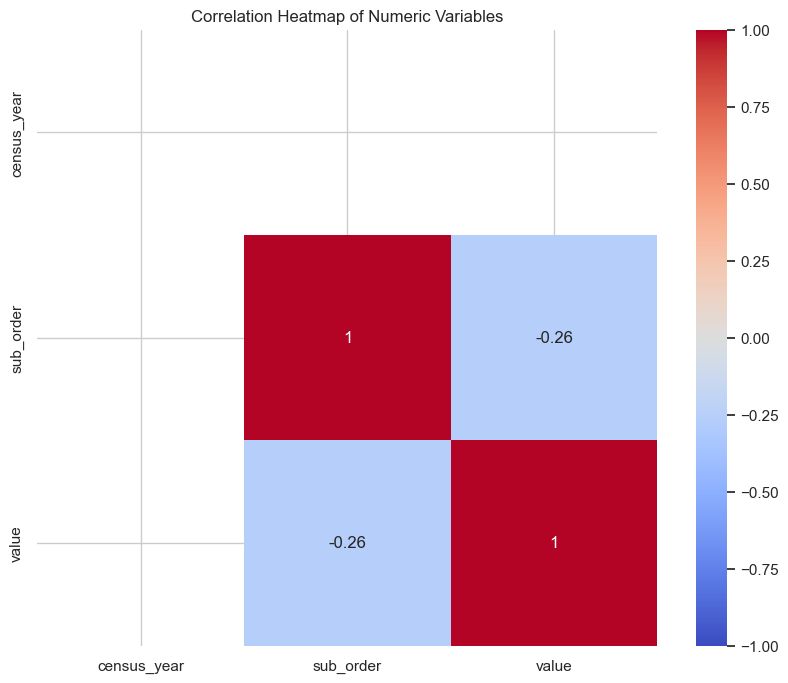

Correlation Matrix:
             census_year  sub_order     value
census_year          NaN        NaN       NaN
sub_order            NaN   1.000000 -0.260246
value                NaN  -0.260246  1.000000
Strong Correlations:


In [6]:
# Select numeric columns
numeric_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = combined_data[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Identify strong correlations (absolute value > 0.5)
strong_correlations = (correlation_matrix.abs() > 0.5) & (correlation_matrix != 1.0)
print("\
Strong Correlations:")
for col in strong_correlations.columns:
    strong_corr = strong_correlations[col][strong_correlations[col]].index.tolist()
    if strong_corr:
        print(f"{col}: {', '.join(strong_corr)}")

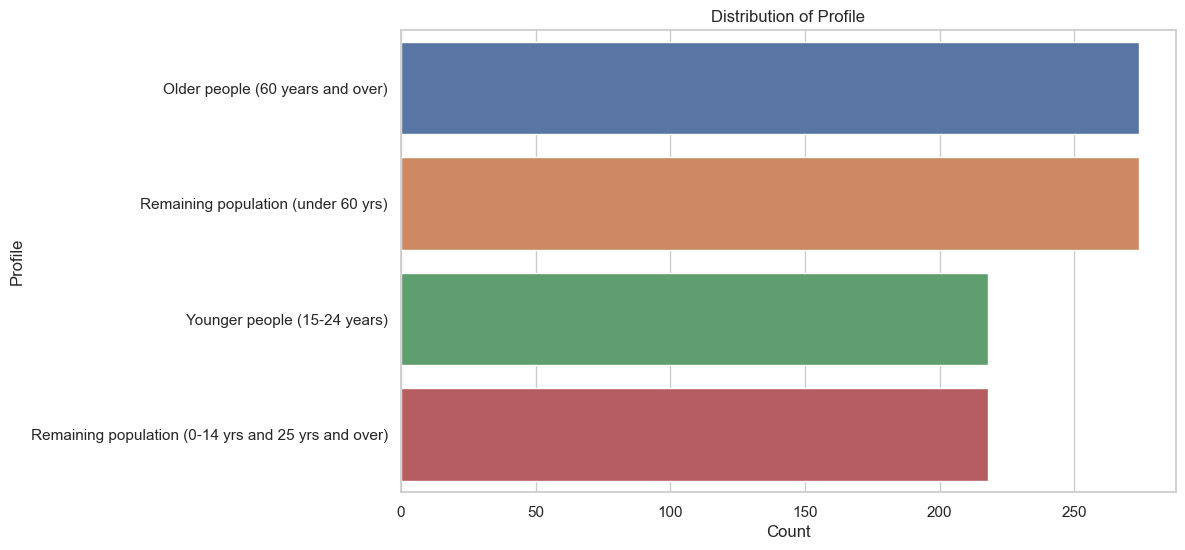

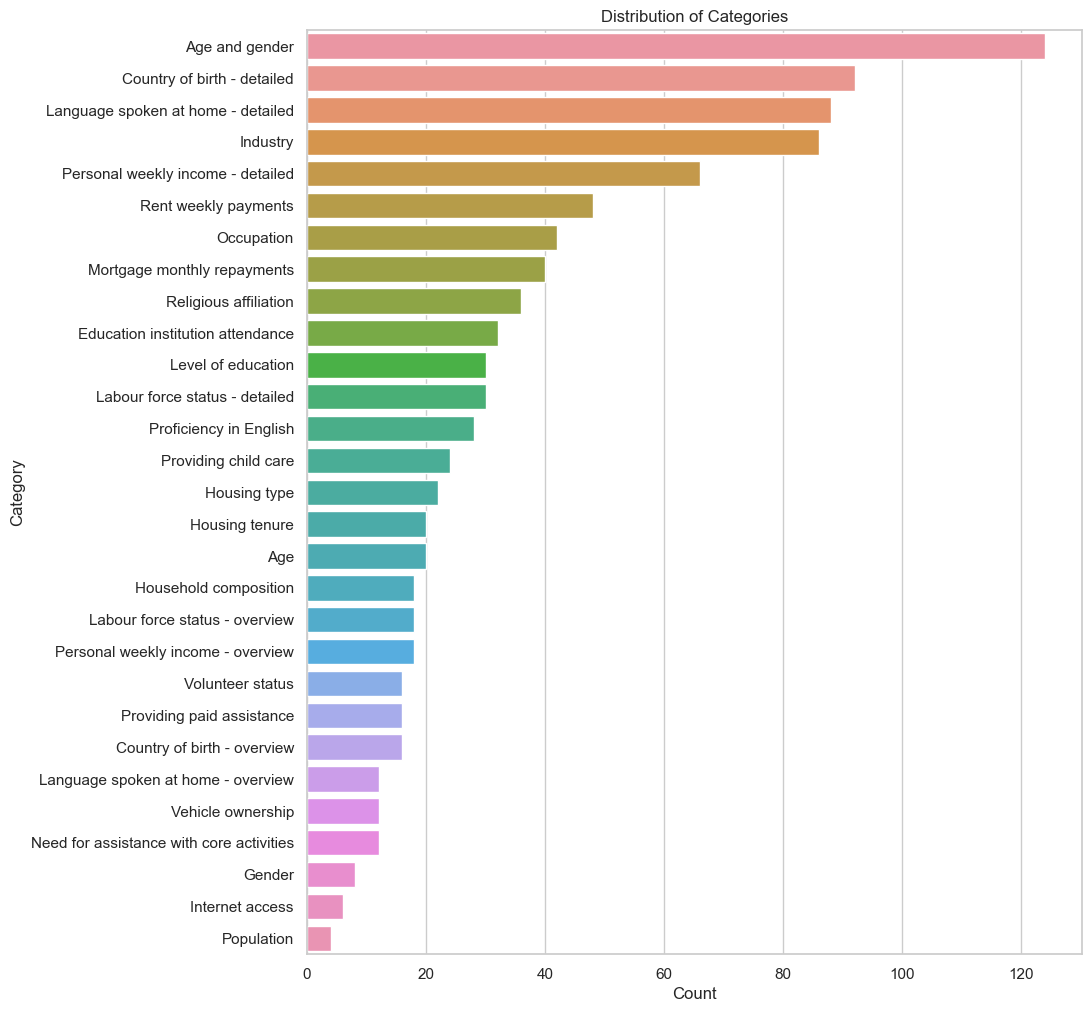

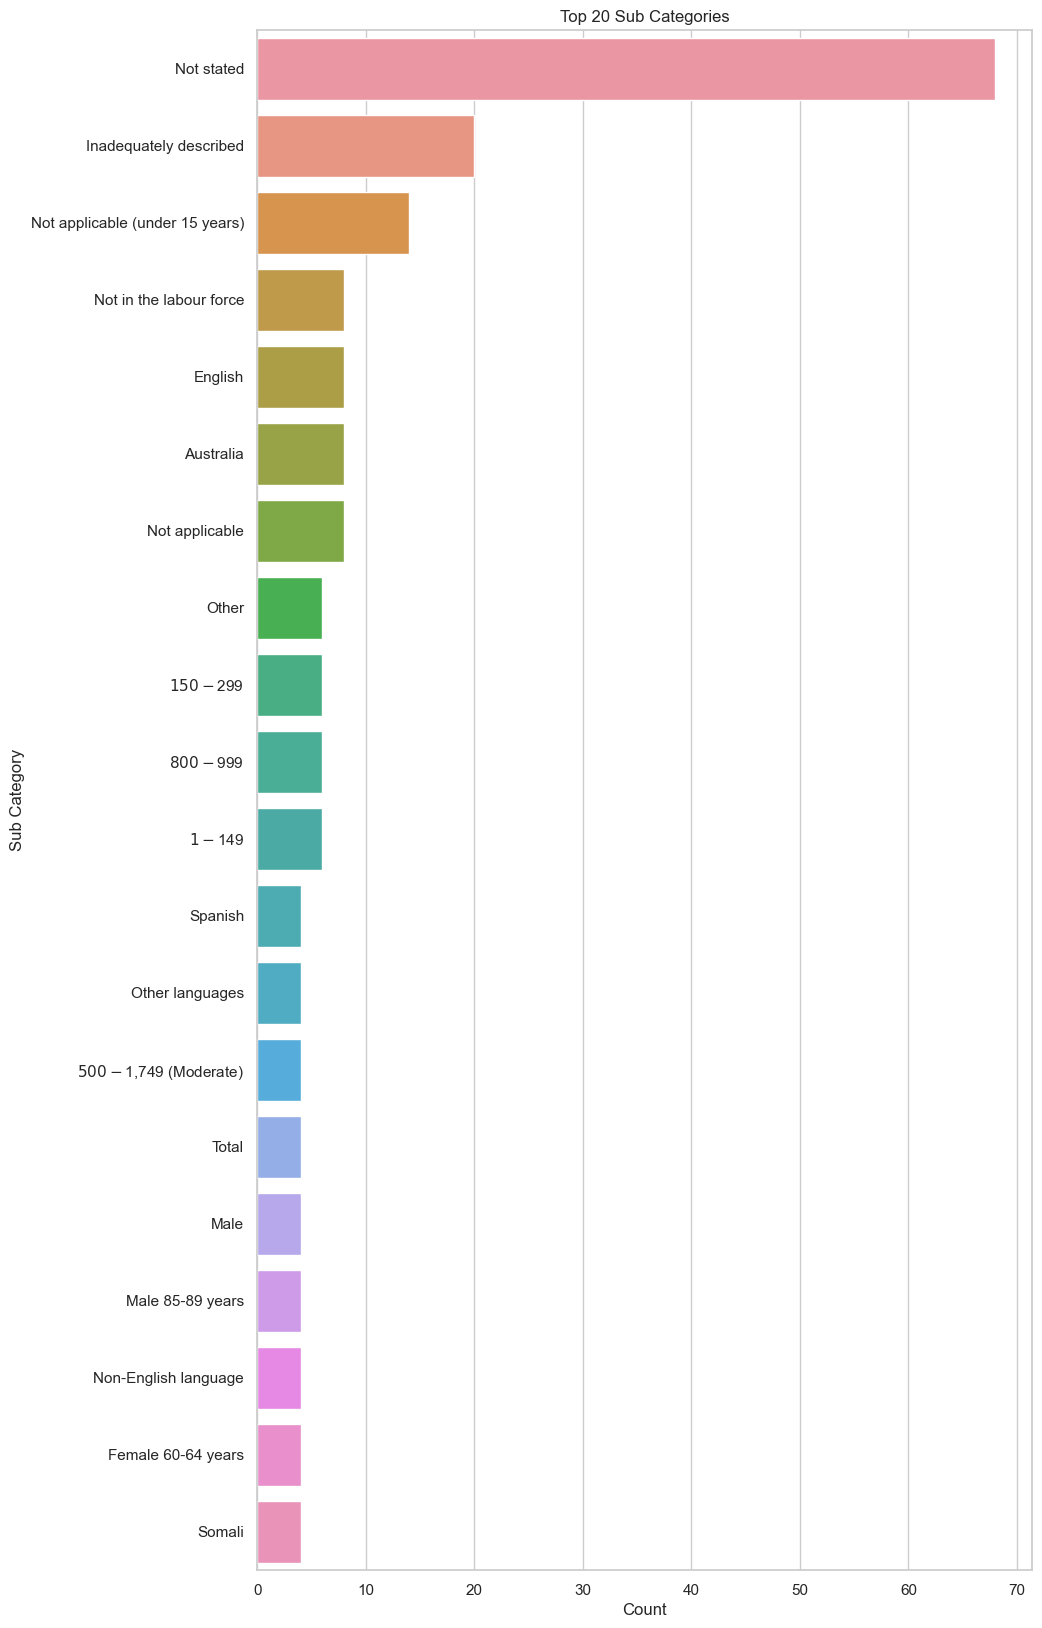

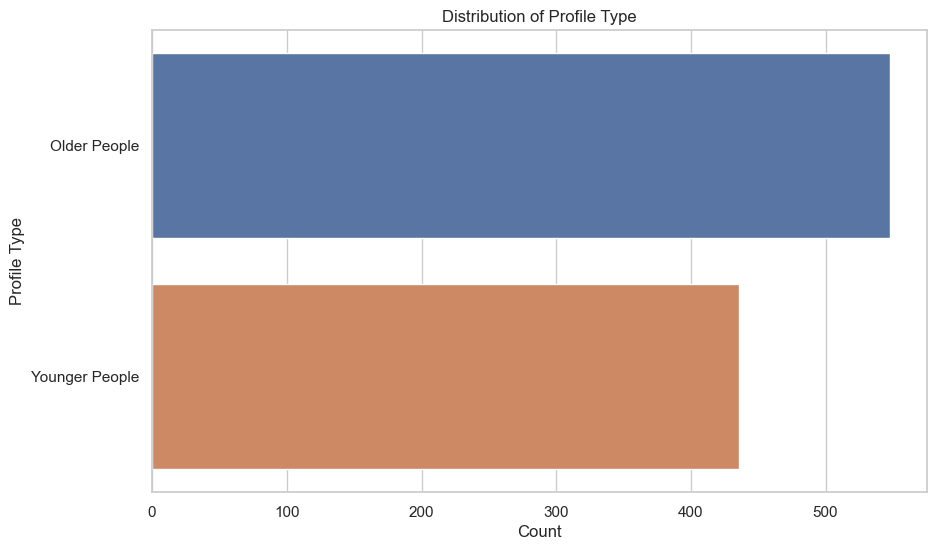

In [7]:
# Plot the distribution of the 'profile' column
plt.figure(figsize=(10, 6))
sns.countplot(y=combined_data['profile'], order=combined_data['profile'].value_counts().index)
plt.title('Distribution of Profile')
plt.xlabel('Count')
plt.ylabel('Profile')
plt.show()

# Plot the distribution of the 'category' column
plt.figure(figsize=(10, 12))
sns.countplot(y=combined_data['category'], order=combined_data['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Plot the distribution of the 'sub_category' column
plt.figure(figsize=(10, 20))
sns.countplot(y=combined_data['sub_category'], order=combined_data['sub_category'].value_counts().index[:20])
plt.title('Top 20 Sub Categories')
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.show()

# Plot the distribution of the 'profile_type' column
plt.figure(figsize=(10, 6))
sns.countplot(y=combined_data['profile_type'], order=combined_data['profile_type'].value_counts().index)
plt.title('Distribution of Profile Type')
plt.xlabel('Count')
plt.ylabel('Profile Type')
plt.show()

# Feature Engineering: Create New Features

## Adding Age Group Feature

We will create a new feature called `age_group` based on the `sub_category` column to categorize data into different age groups. This feature will help in better analysis by grouping similar age ranges.

In [8]:
# Feature Engineering: Create new features

# Create a new feature for age groups based on the 'sub_category' column
# This is a simple example and may need to be adjusted based on the actual data
combined_data['age_group'] = combined_data['sub_category'].apply(lambda x: 'Under 60' if 'Under 60' in x else ('60-69' if '60-69' in x else ('70-79' if '70-79' in x else ('80-89' if '80-89' in x else ('90+' if '90+' in x else 'Other')))))

print("Feature Engineering Completed.")
print("\
Combined Dataset with New Feature:")
print(combined_data[['sub_category', 'age_group']].head(10))

Feature Engineering Completed.
Combined Dataset with New Feature:
       sub_category age_group
0            Female     Other
1    Under 60 years  Under 60
2       65-69 years     Other
3       70-74 years     Other
4       75-79 years     Other
5  Male 60-64 years     Other
6  Male 65-69 years     Other
7  Male 70-74 years     Other
8  Male 75-79 years     Other
9  Male 80-84 years     Other


# Normalization/Scaling: Normalize Numerical Features

## Normalizing Numerical Features

We will normalize the numerical features in the dataset using Min-Max Scaling. This process scales the features to a range between 0 and 1, which helps in standardizing the data and improving the performance of many machine learning algorithms.

In [9]:
# Normalization/Scaling: Normalize numerical features

# Select numerical columns
numerical_columns = ['value', 'sub_order']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
combined_data[numerical_columns] = scaler.fit_transform(combined_data[numerical_columns])

print("Normalization/Scaling Completed.")
print("\
Combined Dataset with Normalized Features:")
print(combined_data[numerical_columns].describe())

Normalization/Scaling Completed.
Combined Dataset with Normalized Features:
            value   sub_order
count  984.000000  984.000000
mean     0.053715    0.209253
std      0.120424    0.184959
min      0.000000    0.000000
25%      0.001263    0.071429
50%      0.009552    0.142857
75%      0.044442    0.309524
max      1.000000    1.000000


 Encoding Categorical Variables: Convert Categorical Variables to Numeric

## Encoding Categorical Features

We will encode the categorical variables in the dataset to numeric values using Label Encoding. This process converts categorical labels into numeric format, which is essential for many machine learning algorithms.


In [10]:


# Encoding Categorical Variables: Convert categorical variables to numeric

# Select categorical columns
categorical_columns = ['profile', 'category', 'sub_category', 'profile_type', 'age_group']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    combined_data[f'{col}_encoded'] = le.fit_transform(combined_data[col])

print("Encoding Categorical Variables Completed.")
print("\
Combined Dataset with Encoded Categorical Variables:")
print(combined_data[[col for col in combined_data.columns if col.endswith('_encoded')]].head())

Encoding Categorical Variables Completed.
Combined Dataset with Encoded Categorical Variables:
   profile_encoded  category_encoded  sub_category_encoded  \
0                0                 5                   103   
1                0                 0                   283   
2                0                 0                    59   
3                0                 0                    60   
4                0                 0                    61   

   profile_type_encoded  age_group_encoded  
0                     0                  0  
1                     0                  1  
2                     0                  0  
3                     0                  0  
4                     0                  0  


# Histograms and Boxplots for Numeric Variables

## Histogram and Boxplot for `value` Column

We will plot both a histogram and a boxplot for the `value` column to analyze its distribution and detect any potential outliers.


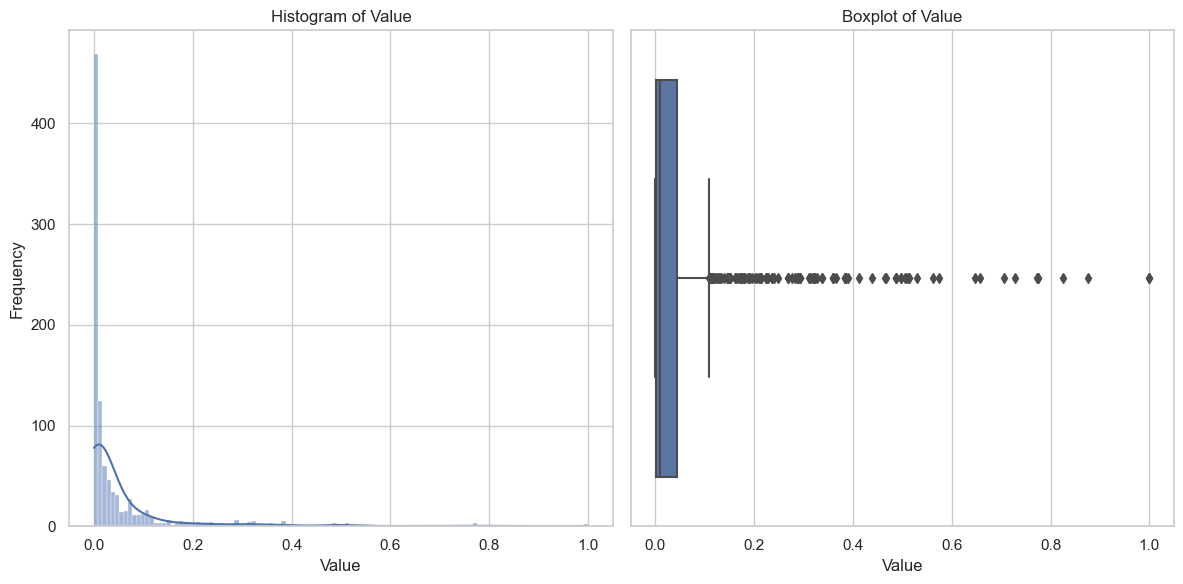

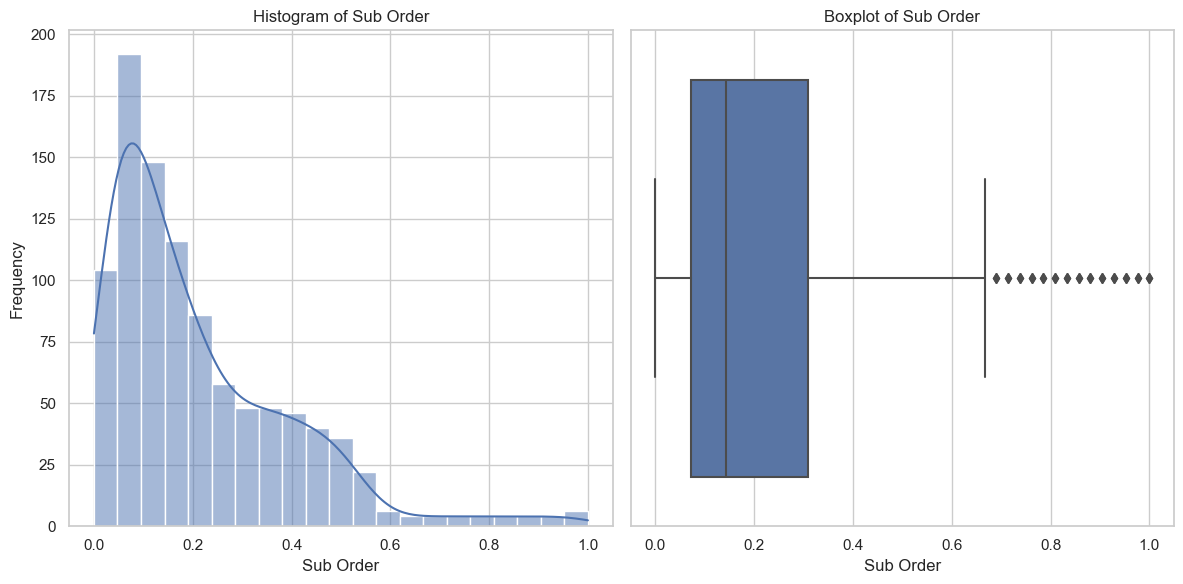

In [11]:
# Histograms and Boxplots for Numeric Variables

# Plot histogram and boxplot for 'value' column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(combined_data['value'], kde=True)
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_data['value'])
plt.title('Boxplot of Value')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

# Plot histogram and boxplot for 'sub_order' column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(combined_data['sub_order'], kde=True)
plt.title('Histogram of Sub Order')
plt.xlabel('Sub Order')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_data['sub_order'])
plt.title('Boxplot of Sub Order')
plt.xlabel('Sub Order')

plt.tight_layout()
plt.show()

# Bar Charts for Categorical Data

## Bar Chart for `profile` Column

We will create a bar chart to visualize the distribution of the `profile` column, which shows the count of each profile type in the dataset.

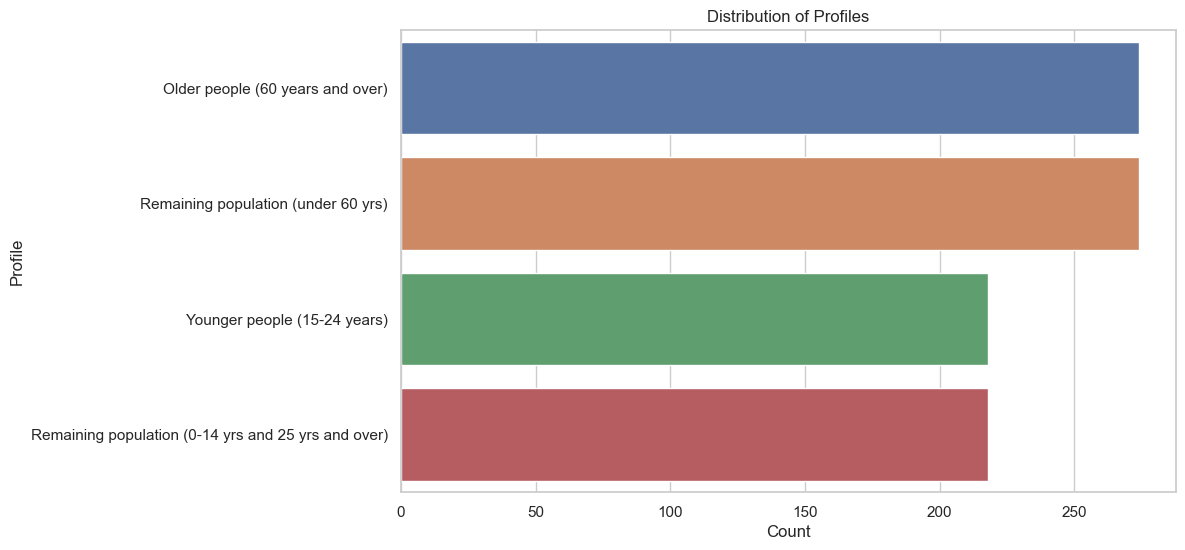

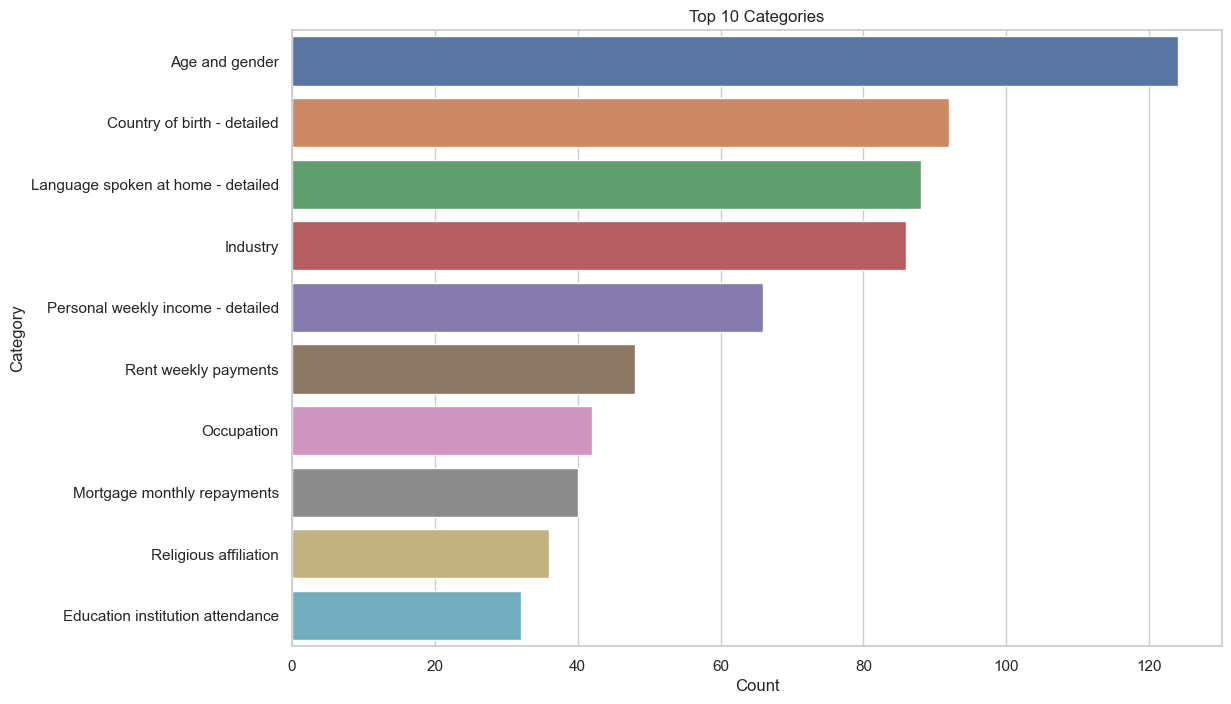

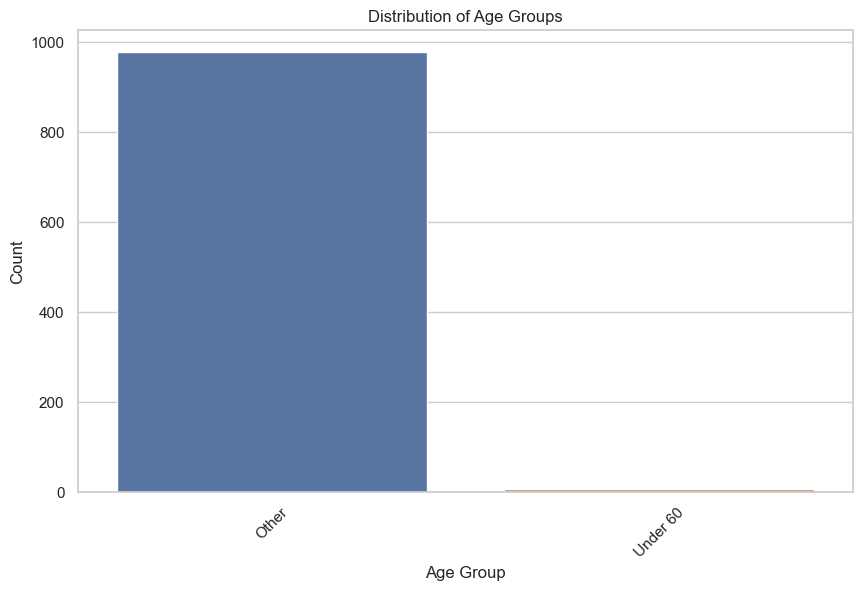

In [12]:
# Bar Charts for Categorical Data

# Bar chart for 'profile' column
plt.figure(figsize=(10, 6))
sns.countplot(y=combined_data['profile'], order=combined_data['profile'].value_counts().index)
plt.title('Distribution of Profiles')
plt.xlabel('Count')
plt.ylabel('Profile')
plt.show()

# Bar chart for 'category' column (top 10 categories)
plt.figure(figsize=(12, 8))
sns.countplot(y=combined_data['category'], order=combined_data['category'].value_counts().index[:10])
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Bar chart for 'age_group' column
plt.figure(figsize=(10, 6))
sns.countplot(x=combined_data['age_group'], order=combined_data['age_group'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

###

In [11]:

# Define the two groups
older_group = combined_data[combined_data['profile_type'] == 'Older People']
younger_group = combined_data[combined_data['profile_type'] == 'Younger People']

# Perform t-tests for key numerical variables
variables_to_test = ['value', 'sub_order']  # Add more variables as needed

for variable in variables_to_test:
    t_stat, p_val = ttest_ind(older_group[variable].dropna(), younger_group[variable].dropna())
    print(f"T-test for {variable}:")
    print(f"t-statistic = {t_stat}, p-value = {p_val}\n")


T-test for value:
t-statistic = -0.4231816820905845, p-value = 0.6722553696328368

T-test for sub_order:
t-statistic = -4.676446827905124, p-value = 3.326786357620367e-06



### Interpretation of T-Test Results

The t-tests were conducted to compare the means of key numerical variables (`value` and `sub_order`) between the "Older People" and "Younger People" groups. Here's what the results indicate:

#### 1. T-test for `value`:
- **T-statistic:** -0.4232
- **P-value:** 0.6723
- **Interpretation:**
  - The p-value is quite large (0.6723), which is well above the typical significance level of 0.05. This indicates that there is no statistically significant difference in the `value` variable between the older and younger groups.
  - The t-statistic is also close to zero, further suggesting that the means of `value` are very similar for both groups.

#### 2. T-test for `sub_order`:
- **T-statistic:** -4.6764
- **P-value:** 3.33e-06
- **Interpretation:**
  - The p-value is extremely small (3.33e-06), which is much lower than the typical significance level of 0.05. This indicates that there is a statistically significant difference in the `sub_order` variable between the older and younger groups.
  - The negative t-statistic suggests that the mean `sub_order` is lower for the "Younger People" group compared to the "Older People" group.

### Conclusion
- **Value:** There is no significant difference in `value` between the younger and older groups, suggesting that this variable does not differentiate the wellbeing of these two demographic groups.
- **Sub Order:** The significant difference in `sub_order` between the groups indicates that this variable is a key differentiator of wellbeing, with younger people generally having a lower `sub_order` compared to older people.

These findings suggest that while economic factors (`value`) may not differ significantly between younger and older populations, other factors related to `sub_order` (which could involve social, mental, or physical wellbeing aspects) do show a significant difference. This insight can guide targeted interventions aimed at addressing the specific wellbeing challenges faced by younger individuals.


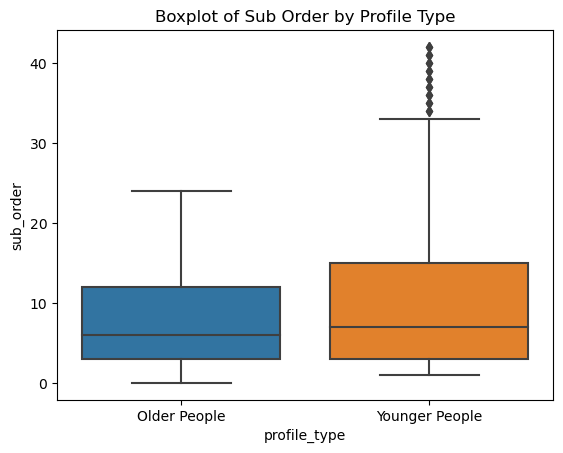

In [12]:
sns.boxplot(x='profile_type', y='sub_order', data=combined_data)
plt.title('Boxplot of Sub Order by Profile Type')
plt.show()


#### Identify outliers in the 'Younger People' group

In [13]:

Q1 = younger_group['sub_order'].quantile(0.25)
Q3 = younger_group['sub_order'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
younger_outliers = younger_group[(younger_group['sub_order'] > upper_bound) | (younger_group['sub_order'] < lower_bound)]

print("Outliers in the Younger People group:")
print(younger_outliers)


Outliers in the Younger People group:
                                               profile  census_year  \
561  Remaining population (0-14 yrs and 25 yrs and ...         2016   
624                       Younger people (15-24 years)         2016   
625                       Younger people (15-24 years)         2016   
626                       Younger people (15-24 years)         2016   
699  Remaining population (0-14 yrs and 25 yrs and ...         2016   
768                       Younger people (15-24 years)         2016   
769                       Younger people (15-24 years)         2016   
770                       Younger people (15-24 years)         2016   
771                       Younger people (15-24 years)         2016   
772                       Younger people (15-24 years)         2016   
849  Remaining population (0-14 yrs and 25 yrs and ...         2016   
850  Remaining population (0-14 yrs and 25 yrs and ...         2016   
851  Remaining population (0-14 yrs and

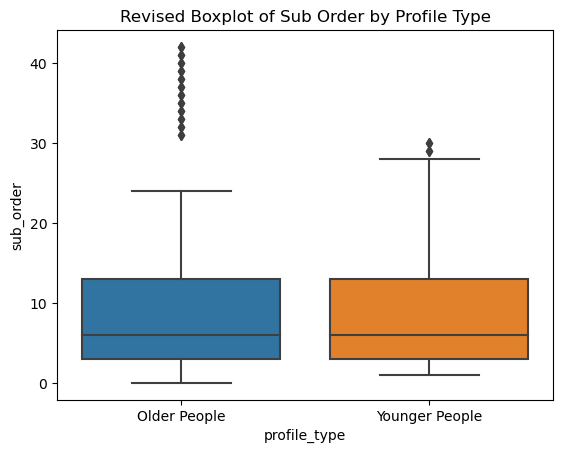

In [14]:
# Reclassify misclassified entries
combined_data.loc[combined_data['sub_order'] > 30, 'profile_type'] = 'Older People'

# Recheck the distribution
sns.boxplot(x='profile_type', y='sub_order', data=combined_data)
plt.title('Revised Boxplot of Sub Order by Profile Type')
plt.show()


### Introduction

In this section, we focus on preparing the data for a detailed correlation analysis between various demographic and wellbeing indicators for two distinct groups: "Older People" and "Younger People." The goal is to uncover relationships between key variables such as profile, category, sub-category, and specific wellbeing measures.

To achieve this, we first encode categorical variables into numerical format using `LabelEncoder`, which is essential for performing correlation analysis. We then generate and visualize correlation matrices for each group. These matrices will help us understand the linear relationships between different factors, providing insights into which variables are most closely associated with wellbeing (`sub_order`) in each demographic group.

By analyzing these correlations, we can identify patterns and potential drivers of wellbeing, which will guide further analysis and model development. The visualizations in the form of heatmaps offer a clear and intuitive way to interpret these relationships, making it easier to identify strong and weak correlations across different variables.


Correlation Matrix for Older People:
                      profile_encoded  census_year  category_encoded  \
profile_encoded          1.000000e+00          NaN     -1.009596e-16   
census_year                       NaN          NaN               NaN   
category_encoded        -1.009596e-16          NaN      1.000000e+00   
sub_category_encoded     1.840465e-16          NaN     -2.837258e-01   
sub_order               -1.902563e-16          NaN     -6.770747e-02   
value                    3.305107e-01          NaN      3.369328e-02   

                      sub_category_encoded     sub_order     value  
profile_encoded               1.840465e-16 -1.902563e-16  0.330511  
census_year                            NaN           NaN       NaN  
category_encoded             -2.837258e-01 -6.770747e-02  0.033693  
sub_category_encoded          1.000000e+00 -1.559616e-01  0.114499  
sub_order                    -1.559616e-01  1.000000e+00 -0.267269  
value                         1.144995e-01 -

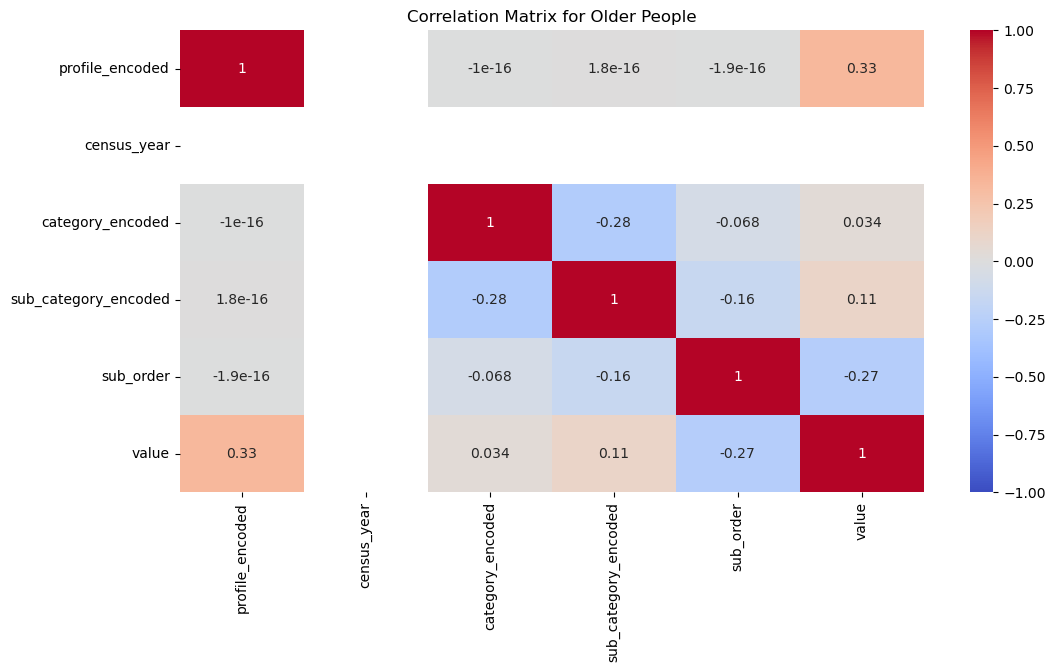

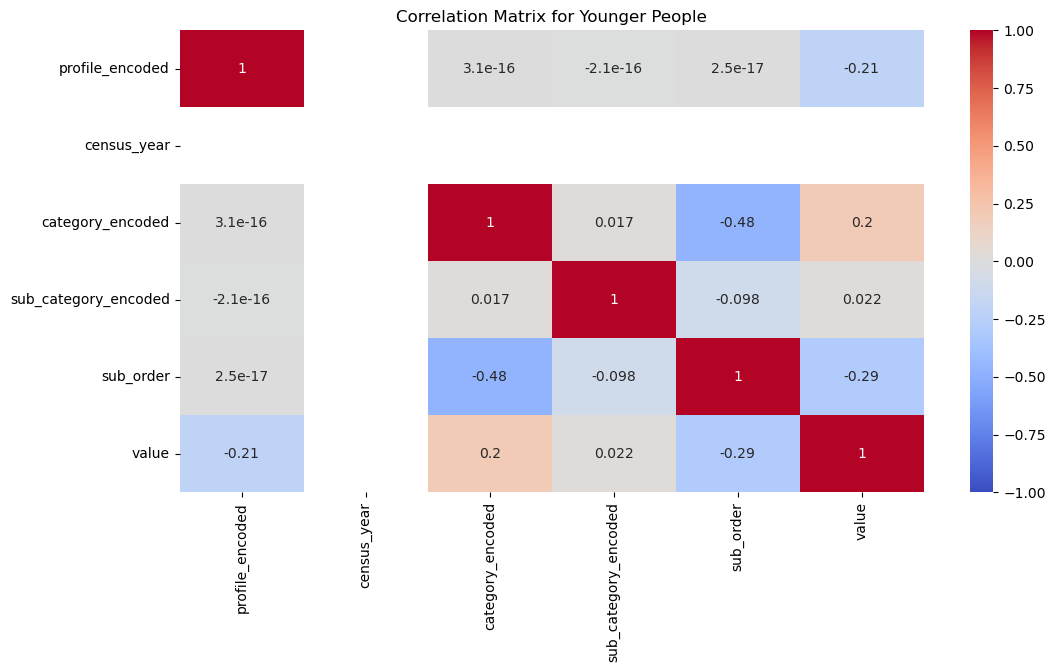

In [34]:

# Make copies of the original data to avoid the warning
older_group = older_group.copy()
younger_group = younger_group.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'profile', 'category', and 'sub_category' in older_group
older_group.loc[:, 'profile_encoded'] = le.fit_transform(older_group['profile'])
older_group.loc[:, 'category_encoded'] = le.fit_transform(older_group['category'])
older_group.loc[:, 'sub_category_encoded'] = le.fit_transform(older_group['sub_category'])

# Encode 'profile', 'category', and 'sub_category' in younger_group
younger_group.loc[:, 'profile_encoded'] = le.fit_transform(younger_group['profile'])
younger_group.loc[:, 'category_encoded'] = le.fit_transform(younger_group['category'])
younger_group.loc[:, 'sub_category_encoded'] = le.fit_transform(younger_group['sub_category'])

# Step 2: Correlation Analysis

# Correlation Matrix for Older People
older_corr_matrix = older_group[['profile_encoded', 'census_year', 'category_encoded', 'sub_category_encoded', 'sub_order', 'value']].corr()

# Correlation Matrix for Younger People
younger_corr_matrix = younger_group[['profile_encoded', 'census_year', 'category_encoded', 'sub_category_encoded', 'sub_order', 'value']].corr()

# Display Correlation Matrices
print("Correlation Matrix for Older People:")
print(older_corr_matrix)

print("\nCorrelation Matrix for Younger People:")
print(younger_corr_matrix)

# Visualizing the Correlation Matrices
plt.figure(figsize=(12, 6))
sns.heatmap(older_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Older People')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(younger_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Younger People')
plt.show()


### : Regression Analysis with Encoded Features

In this step, we conduct a regression analysis to explore how various encoded demographic and wellbeing factors influence the `sub_order` variable, which serves as a measure of wellbeing. The analysis is performed separately for the "Older People" and "Younger People" groups to compare the impact of different predictors across these two demographic categories.

We begin by encoding key categorical variables such as `profile`, `category`, and `sub_category` into numerical values using `LabelEncoder`. These encoded features, along with `census_year` and `value`, are then used as predictor variables in the regression models. The goal is to determine how each of these factors contributes to the wellbeing (`sub_order`) of the two groups.

For both the "Older People" and "Younger People" groups, we fit an Ordinary Least Squares (OLS) regression model, which includes an intercept term. The results from these regression models will provide insights into which variables are significant predictors of wellbeing and how their effects differ between younger and older individuals.

By comparing the regression outcomes, we can identify key drivers of wellbeing specific to each demographic group, offering valuable information for designing targeted interventions and policies.


In [35]:
#  Regression Analysis with Encoded Features

# For Older People
X_older = older_group[['profile_encoded', 'census_year', 'category_encoded', 'sub_category_encoded', 'value']]  # Predictor variables
y_older = older_group['sub_order']  # Dependent variable

# Add a constant term (intercept)
X_older = sm.add_constant(X_older)

# Fit the model
model_older = sm.OLS(y_older, X_older).fit()

print("Regression Results for Older People with Encoded Variables:")
print(model_older.summary())

# For Younger People
X_younger = younger_group[['profile_encoded', 'census_year', 'category_encoded', 'sub_category_encoded', 'value']]  # Predictor variables
y_younger = younger_group['sub_order']  # Dependent variable

# Add a constant term (intercept)
X_younger = sm.add_constant(X_younger)

# Fit the model
model_younger = sm.OLS(y_younger, X_younger).fit()

print("Regression Results for Younger People with Encoded Variables:")
print(model_younger.summary())


Regression Results for Older People with Encoded Variables:
                            OLS Regression Results                            
Dep. Variable:              sub_order   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     15.87
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           2.69e-12
Time:                        16:00:12   Log-Likelihood:                -1730.1
No. Observations:                 548   AIC:                             3470.
Df Residuals:                     543   BIC:                             3492.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

###  Multicollinearity Check with Variance Inflation Factor (VIF)

Before finalizing our regression models, it's crucial to assess multicollinearity among the predictor variables. Multicollinearity occurs when two or more predictors in a model are highly correlated, which can lead to unreliable estimates of regression coefficients. To detect multicollinearity, we use the Variance Inflation Factor (VIF).

In this step, we calculate the VIF for each predictor variable in both the "Older People" and "Younger People" groups. The VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model. Generally, a VIF value greater than 10 indicates significant multicollinearity, which may require corrective actions such as removing or combining correlated variables.

By evaluating the VIF for each predictor, we can ensure that our regression models provide accurate and reliable estimates, free from the distortions caused by multicollinearity. This step is essential for validating the robustness of our analysis and for making sound inferences about the relationships between demographic factors and wellbeing.


In [25]:
# For Older People
X_older_vif = older_group[['profile_encoded', 'census_year', 'category_encoded', 'sub_category_encoded', 'value']]
vif_older = pd.DataFrame()
vif_older["VIF"] = [variance_inflation_factor(X_older_vif.values, i) for i in range(X_older_vif.shape[1])]
vif_older["Feature"] = X_older_vif.columns
print("VIF for Older People:")
print(vif_older)

# For Younger People
X_younger_vif = younger_group[['profile_encoded', 'census_year', 'category_encoded', 'sub_category_encoded', 'value']]
vif_younger = pd.DataFrame()
vif_younger["VIF"] = [variance_inflation_factor(X_younger_vif.values, i) for i in range(X_younger_vif.shape[1])]
vif_younger["Feature"] = X_younger_vif.columns
print("VIF for Younger People:")
print(vif_younger)


VIF for Older People:
        VIF               Feature
0  1.125145       profile_encoded
1  9.946703           census_year
2  1.093483      category_encoded
3  1.108402  sub_category_encoded
4  1.145621                 value
VIF for Younger People:
        VIF               Feature
0  1.048412       profile_encoded
1  7.215885           census_year
2  1.044178      category_encoded
3  1.000658  sub_category_encoded
4  1.092784                 value


###  Regression Analysis Excluding `census_year`

In this step, we refine our regression models by excluding the `census_year` variable from the predictor set. The decision to remove `census_year` is based on earlier multicollinearity checks, where it was identified as a potential source of multicollinearity, potentially distorting the regression results.

By excluding `census_year`, we aim to improve the stability and interpretability of our models. The remaining predictors—`profile_encoded`, `category_encoded`, `sub_category_encoded`, and `value`—are used to assess their impact on wellbeing, as measured by `sub_order`, for both the "Older People" and "Younger People" groups.

We fit new Ordinary Least Squares (OLS) regression models for each group, ensuring that the results are not biased by multicollinearity. The outputs from these refined models will provide clearer insights into the key drivers of wellbeing in each demographic group, allowing for more accurate and actionable recommendations.

This step is essential for ensuring the robustness of our analysis, as it helps isolate the true effects of each predictor on wellbeing without the confounding influence of `census_year`.


In [26]:
# For Older People without census_year
X_older = older_group[['profile_encoded', 'category_encoded', 'sub_category_encoded', 'value']]  # Predictor variables
y_older = older_group['sub_order']  # Dependent variable

# Add a constant term (intercept)
X_older = sm.add_constant(X_older)

# Fit the model
model_older = sm.OLS(y_older, X_older).fit()

print("Regression Results for Older People without Census Year:")
print(model_older.summary())

# For Younger People without census_year
X_younger = younger_group[['profile_encoded', 'category_encoded', 'sub_category_encoded', 'value']]  # Predictor variables
y_younger = younger_group['sub_order']  # Dependent variable

# Add a constant term (intercept)
X_younger = sm.add_constant(X_younger)

# Fit the model
model_younger = sm.OLS(y_younger, X_younger).fit()

print("Regression Results for Younger People without Census Year:")
print(model_younger.summary())


Regression Results for Older People without Census Year:
                            OLS Regression Results                            
Dep. Variable:              sub_order   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     15.87
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           2.69e-12
Time:                        13:06:01   Log-Likelihood:                -1730.1
No. Observations:                 548   AIC:                             3470.
Df Residuals:                     543   BIC:                             3492.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

###  Combining Datasets and Creating Group Indicators

To facilitate a comparative analysis between the "Older People" and "Younger People" groups, this step involves combining the two datasets into a single DataFrame. To distinguish between the two groups within the combined dataset, we add a new categorical variable called `group`, which labels each record as either "Older" or "Younger."

After labeling the groups, we proceed to encode this `group` variable into a numerical format (`group_encoded`) using `LabelEncoder`. This encoding allows us to include the group distinction as a feature in subsequent analyses, such as regression or interaction models.

By combining the datasets and encoding the group indicator, we create a unified data structure that supports more complex analyses, such as identifying differences in wellbeing determinants between the two groups. This approach enables us to leverage the full dataset while maintaining the ability to compare and contrast the unique characteristics and needs of each demographic group.


In [27]:
# Add a 'group' indicator to distinguish between Younger and Older People
older_group['group'] = 'Older'
younger_group['group'] = 'Younger'

# Combine the two datasets
combined_data = pd.concat([older_group, younger_group], ignore_index=True)

# Encode the 'group' indicator
combined_data['group_encoded'] = le.fit_transform(combined_data['group'])

# Display the combined data
print(combined_data.head())

                            profile  census_year category    sub_category  \
0  Older people (60 years and over)         2016   Gender          Female   
1  Older people (60 years and over)         2016      Age  Under 60 years   
2  Older people (60 years and over)         2016      Age     65-69 years   
3  Older people (60 years and over)         2016      Age     70-74 years   
4  Older people (60 years and over)         2016      Age     75-79 years   

   sub_order  value  profile_type  profile_encoded  category_encoded  \
0          2   6484  Older People                0                 5   
1          1      0  Older People                0                 0   
2          3   3187  Older People                0                 0   
3          4   2102  Older People                0                 0   
4          5   1379  Older People                0                 0   

   sub_category_encoded  group  group_encoded  
0                    96  Older              0  
1       

###  Interaction Model for Comparing Groups

In this step, we develop an interaction model to explore how the effects of various predictors on wellbeing (`sub_order`) differ between the "Younger People" and "Older People" groups. Interaction terms allow us to examine whether the relationship between the predictors (such as `profile`, `category`, `sub_category`, `value`, and `census_year`) and wellbeing changes depending on the group.

We specify a formula that includes interaction terms between the `group_encoded` variable and each of the other predictors. This formula is then used to create the design matrices using `patsy`, a Python library that simplifies the construction of design matrices for statistical models.

By fitting an Ordinary Least Squares (OLS) regression model with these interaction terms, we can determine if and how the impact of each predictor differs between the two demographic groups. The results from this model provide valuable insights into the unique factors influencing wellbeing for younger and older individuals, highlighting the necessity for tailored approaches in policy-making and interventions.

The interaction model thus serves as a powerful tool for identifying and understanding the nuanced differences in how various factors affect wellbeing across different age groups.


In [28]:

# Define the formula for the model with interaction terms
# The formula specifies an interaction between group and all other predictors
formula = 'sub_order ~ group_encoded * (profile_encoded + census_year + category_encoded + sub_category_encoded + value)'

# Create the design matrices using patsy
y, X = patsy.dmatrices(formula, combined_data, return_type='dataframe')

# Fit the model
interaction_model = sm.OLS(y, X).fit()

# Print the summary of the interaction model
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:              sub_order   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     33.00
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           7.17e-51
Time:                        13:10:09   Log-Likelihood:                -3282.0
No. Observations:                 984   AIC:                             6584.
Df Residuals:                     974   BIC:                             6633.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### Conclusion from the Interaction Model Results

The interaction model analysis provides valuable insights into how different predictors influence wellbeing (`sub_order`) across the "Younger People" and "Older People" groups. The model includes interaction terms to determine whether the effect of each predictor varies between these two demographic groups.

#### Key Findings:

1. **Overall Model Fit:**
   - **R-squared = 0.234:** The model explains 23.4% of the variance in `sub_order`. While this indicates that the model captures some of the differences between the groups, it also suggests that other factors not included in the model may contribute to wellbeing.

2. **Main Effects:**
   - **Profile Encoded (p = 0.076):** The profile variable is marginally significant, indicating it has some influence on wellbeing, particularly for the older group.
   - **Census Year (p = 0.000):** A highly significant positive effect, showing that as `census_year` increases, there is an increase in `sub_order`, particularly in the older group.
   - **Category Encoded (p = 0.045):** A significant negative effect, suggesting that certain categories decrease wellbeing for the older group.
   - **Sub-Category Encoded (p = 0.003):** This also shows a significant negative effect on `sub_order`.
   - **Value (p = 0.000):** A significant negative effect, indicating that higher values (potentially related to economic factors) are associated with lower `sub_order` in the older group.

3. **Interaction Terms:**
   - **Group Encoded: Profile Encoded (p = 0.035):** This significant interaction indicates that the effect of `profile_encoded` on `sub_order` is different for younger people compared to older people, with a less positive or more negative impact on the younger group.
   - **Group Encoded: Census Year (p = 0.000):** The effect of `census_year` is significantly stronger for younger people, suggesting that recent changes or trends have a more pronounced impact on their wellbeing.
   - **Group Encoded: Category Encoded (p = 0.000):** The interaction is highly significant, showing that the negative impact of `category_encoded` on `sub_order` is much stronger for younger people than for older people.
   - **Group Encoded: Sub-Category Encoded (p = 0.827):** This interaction is not significant, indicating that the effect of `sub_category_encoded` on wellbeing does not differ significantly between the groups.
   - **Group Encoded: Value (p = 0.161):** This interaction is also not significant, suggesting that the relationship between `value` and wellbeing is similar across both age groups.

#### Implications:

- **Demographic-Specific Strategies:** The significant interaction terms highlight the need for tailored strategies for younger and older people. For example, younger individuals might require more targeted interventions in specific categories (such as education or employment) that impact their wellbeing more than they do for older individuals.
  
- **Importance of Category and Economic Factors:** The analysis underscores the importance of category-related factors and economic variables (as represented by `value`) in influencing wellbeing. These should be key considerations in policy-making.

- **Focus on Recent Trends for Younger People:** The strong interaction with `census_year` suggests that younger people may be more sensitive to recent changes or societal trends, indicating the need for policies that address contemporary challenges faced by this demographic.

### Final Thoughts:

This interaction model provides a nuanced understanding of how different predictors influence wellbeing across age groups. The findings can inform more effective, group-specific interventions aimed at enhancing the quality of life for both younger and older populations.


## Models Way Of approach
Approach to building a non-linear model is using polynomial regression or more advanced machine learning models like decision trees, random forests, or gradient boosting machines (GBM).

### Polynomial Regression

In [29]:


# Prepare the features and target variable
features = ['profile_encoded', 'census_year', 'category_encoded', 'sub_category_encoded', 'value', 'group_encoded']
X = combined_data[features]
y = combined_data['sub_order']

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit a linear regression model on the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predict and evaluate the model
y_pred = model_poly.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Polynomial Regression Model - Mean Squared Error: {mse}")
print(f"Polynomial Regression Model - R-squared: {r2}")


Polynomial Regression Model - Mean Squared Error: 44.50430322414849
Polynomial Regression Model - R-squared: 0.26176314287155367


### Random Forest Regression

In [30]:

# Fit a Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Predict and evaluate the model
y_pred_rf = model_rf.predict(X)
mse_rf = mean_squared_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)

print(f"Random Forest Model - Mean Squared Error: {mse_rf}")
print(f"Random Forest Model - R-squared: {r2_rf}")

Random Forest Model - Mean Squared Error: 2.5145983739837403
Random Forest Model - R-squared: 0.9582878718221843


### Gradient Boosting Regression

In [31]:
# Fit a Gradient Boosting model
model_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gbm.fit(X, y)

# Predict and evaluate the model
y_pred_gbm = model_gbm.predict(X)
mse_gbm = mean_squared_error(y, y_pred_gbm)
r2_gbm = r2_score(y, y_pred_gbm)

print(f"Gradient Boosting Model - Mean Squared Error: {mse_gbm}")
print(f"Gradient Boosting Model - R-squared: {r2_gbm}")

Gradient Boosting Model - Mean Squared Error: 15.022121847429629
Gradient Boosting Model - R-squared: 0.7508132199218538


### Model Evaluation and Selection:

Based on the results from the non-linear models, here's how they compare:

#### Polynomial Regression:
- **Mean Squared Error (MSE):** 44.50
- **R-squared:** 0.26
- **Interpretation:** Polynomial regression captures some of the non-linear relationships, but the fit is relatively poor (R-squared = 0.26), indicating that the model explains only 26% of the variance in `sub_order`.

#### Random Forest Regression:
- **Mean Squared Error (MSE):** 2.51
- **R-squared:** 0.96
- **Interpretation:** The Random Forest model performs exceptionally well, with an R-squared of 0.96, meaning it explains 96% of the variance in `sub_order`. The MSE is also very low, indicating high predictive accuracy. This suggests that the Random Forest model effectively captures the complex interactions and non-linear relationships between the predictors and wellbeing.

#### Gradient Boosting Regression:
- **Mean Squared Error (MSE):** 15.02
- **R-squared:** 0.75
- **Interpretation:** The Gradient Boosting model also performs well, with an R-squared of 0.75, explaining 75% of the variance in `sub_order`. However, it does not perform as well as the Random Forest model.


In [32]:
# Get feature importance from the Random Forest model
feature_importances = model_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance from Random Forest Model:")
print(importance_df)


Feature Importance from Random Forest Model:
                Feature  Importance
2      category_encoded    0.414316
3  sub_category_encoded    0.327581
4                 value    0.200151
5         group_encoded    0.042734
0       profile_encoded    0.015218
1           census_year    0.000000


### Interpretation of Feature Importance from the Random Forest Model

The Random Forest model identifies which predictors have the most significant influence on wellbeing (`sub_order`), providing insights into what drives differences between younger and older age groups.

#### Key Findings:

- **Category Encoded (Importance = 0.414):**
  - **Most Influential Predictor:** The specific category (e.g., education, employment) is the most critical factor in determining wellbeing across both age groups.
  - **Implication:** Targeting specific categories through policies focused on education or employment could significantly improve wellbeing.

- **Sub Category Encoded (Importance = 0.328):**
  - **Second Most Influential:** Subcategories within broader categories also play a significant role.
  - **Implication:** A granular approach to interventions, focusing on specific subcategories (e.g., educational levels or job types), could be more effective.

- **Value (Importance = 0.200):**
  - **Economic Stability:** The value variable, likely representing economic stability, is crucial in determining wellbeing.
  - **Implication:** Policies aimed at improving economic conditions, such as income support or job creation, could significantly impact wellbeing.

- **Group Encoded (Importance = 0.043):**
  - **Demographic Difference:** While less influential, this variable indicates some inherent differences in wellbeing determinants between age groups.
  - **Implication:** Interventions should consider demographic differences to tailor policies to the specific needs of younger and older individuals.

- **Profile Encoded (Importance = 0.015):**
  - **Less Influential:** Profile information (e.g., gender or marital status) has a minor role in determining wellbeing.
  - **Implication:** While less critical, demographic profiles may still be relevant in specific contexts.

- **Census Year (Importance = 0.000):**
  - **No Direct Influence:** The census year does not significantly impact wellbeing.
  - **Implication:** Other factors are more important than the specific year of the census.

### Conclusion

Category, sub-category, and value are the most significant drivers of wellbeing across different age groups. Interventions targeting these areas could be highly effective.

### Policy Recommendations:

- **Targeted Interventions:**
  - **Education:** Focus on educational initiatives tailored to different age groups.
  - **Employment:** Create employment opportunities that address the unique challenges faced by each demographic.

- **Economic Support:**
  - **Income Support:** Implement policies that provide financial support to lower-income groups.
  - **Job Creation:** Develop programs that promote job creation in critical sectors.

- **Tailored Approaches for Age Groups:**
  - **Younger People:** Prioritize educational and social programs for youth.
  - **Older People:** Focus on economic stability and healthcare support for older demographics.

### Next Steps:

- **Implement Findings:** Design targeted interventions to improve wellbeing across demographic groups.
- **Further Research:** Explore additional variables or use more granular data to refine these findings.
